In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from video      import read_qcif, save_qcif, height, width
from tools      import compression_benchmark, quality_benchmark
from Difference_image import Difference_image_compute, Difference_image_reverse
from LZW        import LZW_encode, LZW_decode
from Huffman    import Huffman_encode, Huffman_decode
from DCT        import DCT_compute, DCT_inverse
from Motion_estimation import Motion_estimate_compute, Motion_estimate_inverse


# Format for qcif images
width = 176
height = 144
frame_size = width*height + 2*width//2*height//2

videos_names = []
for fname in os.listdir("./videos"):
    if fname.endswith(".qcif"):
        videos_names.append("./videos/"+fname)
print(videos_names)

['./videos/coastguard.qcif', './videos/hall.qcif', './videos/news.qcif', './videos/akiyo.qcif', './videos/carphone.qcif']


# Compression using the difference image and entropic coding

#############################################################################################
#--------------------------------------#
Diff on ./videos/coastguard.qcif
Mean MSE:  0.0


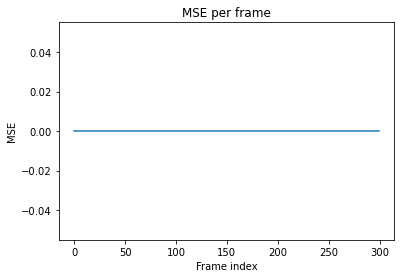

Building the dictionary:   0%|          | 0/11404799 [00:00<?, ?it/s]


#--------------------------------------#
Diff+LZW on ./videos/coastguard.qcif


Decoding: 100%|██████████| 2472692/2472692 [00:10<00:00, 228041.66it/s]


B/symb:  4.769857603815937
Original size (MiB):  10.87646484375
Compressed size (%):  59.62322004769921

#--------------------------------------#
Diff+Huffman on ./videos/coastguard.qcif


Decoding: 100%|██████████| 51512688/51512688 [00:44<00:00, 1157931.83it/s]


B/symb:  4.517092627665544
Original size (MiB):  10.87646484375
Compressed size (%):  56.463657845819306



#############################################################################################
#--------------------------------------#
Diff on ./videos/hall.qcif
Mean MSE:  0.0


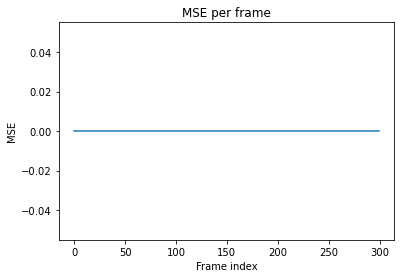

Building the dictionary:   0%|          | 0/11404799 [00:00<?, ?it/s]


#--------------------------------------#
Diff+LZW on ./videos/hall.qcif


Decoding: 100%|██████████| 1858826/1858826 [00:09<00:00, 199239.13it/s]


B/symb:  3.4227161370650956
Original size (MiB):  10.87646484375
Compressed size (%):  42.7839517133137

#--------------------------------------#
Diff+Huffman on ./videos/hall.qcif


Decoding: 100%|██████████| 37967302/37967302 [00:32<00:00, 1167764.06it/s]


B/symb:  3.32935746352413
Original size (MiB):  10.87646484375
Compressed size (%):  41.616968294051624



#############################################################################################
#--------------------------------------#
Diff on ./videos/news.qcif
Mean MSE:  0.0


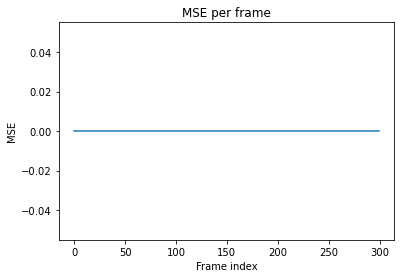

Building the dictionary:   0%|          | 0/11404799 [00:00<?, ?it/s]


#--------------------------------------#
Diff+LZW on ./videos/news.qcif


Decoding: 100%|██████████| 1008497/1008497 [00:04<00:00, 202549.41it/s]


B/symb:  1.7685523639169471
Original size (MiB):  10.87646484375
Compressed size (%):  22.10690454896184

#--------------------------------------#
Diff+Huffman on ./videos/news.qcif


Decoding: 100%|██████████| 24970139/24970139 [00:21<00:00, 1160118.89it/s]


B/symb:  2.189780180274972
Original size (MiB):  10.87646484375
Compressed size (%):  27.37225225343715



#############################################################################################
#--------------------------------------#
Diff on ./videos/akiyo.qcif
Mean MSE:  0.0


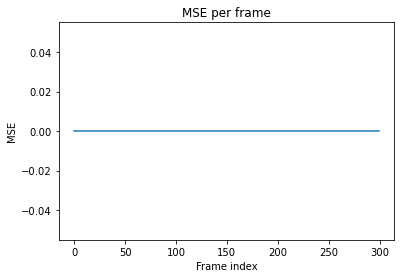

Building the dictionary:   0%|          | 0/11404799 [00:00<?, ?it/s]


#--------------------------------------#
Diff+LZW on ./videos/akiyo.qcif


Decoding: 100%|██████████| 655769/655769 [00:04<00:00, 144788.00it/s]


B/symb:  1.1499917578563412
Original size (MiB):  10.87646484375
Compressed size (%):  14.374896973204265

#--------------------------------------#
Diff+Huffman on ./videos/akiyo.qcif


Decoding: 100%|██████████| 18543891/18543891 [00:16<00:00, 1156119.53it/s]


B/symb:  1.6262406179854096
Original size (MiB):  10.87646484375
Compressed size (%):  20.32800772481762



#############################################################################################
#--------------------------------------#
Diff on ./videos/carphone.qcif
Mean MSE:  0.0


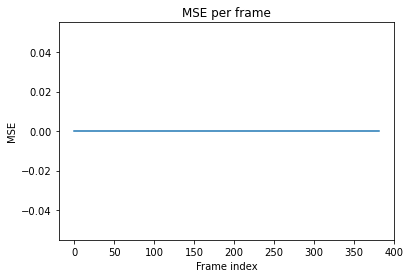

Building the dictionary:   0%|          | 0/14522111 [00:00<?, ?it/s]


#--------------------------------------#
Diff+LZW on ./videos/carphone.qcif


Decoding: 100%|██████████| 2605204/2605204 [00:13<00:00, 188678.17it/s]


B/symb:  3.9467080270417965
Original size (MiB):  13.849365234375
Compressed size (%):  49.33385033802246

#--------------------------------------#
Diff+Huffman on ./videos/carphone.qcif


Decoding: 100%|██████████| 56626538/56626538 [00:47<00:00, 1187083.01it/s]


B/symb:  3.8995818239110123
Original size (MiB):  13.849365234375
Compressed size (%):  48.74477279888765





In [2]:
for fname in videos_names:
    frames = read_qcif(fname)
    nb_frames = len(frames)
    
    diff = Difference_image_compute(frames)
    decompressed_data = Difference_image_reverse(diff)
    save_qcif("test_res_diff.qcif",decompressed_data)
    print("#############################################################################################")
    print("#--------------------------------------#")
    print("Diff on "+fname)
    quality_benchmark(frames,decompressed_data)
    print()
    print("#--------------------------------------#")
    print("Diff+LZW on "+fname)
    bitstream = LZW_encode(diff.flatten())
    decompressed_diff = LZW_decode(bitstream)
    decompressed_data = Difference_image_reverse(np.array(decompressed_diff,dtype=float).reshape(nb_frames,-1))
    compression_benchmark(frames,bitstream)
    print()
    print("#--------------------------------------#")
    print("Diff+Huffman on "+fname)
    bitstream = Huffman_encode(diff.flatten())
    decompressed_diff = Huffman_decode(bitstream)
    decompressed_data = Difference_image_reverse(np.array(decompressed_diff,dtype=float).reshape(nb_frames,-1))
    compression_benchmark(frames,bitstream)
    print("\n\n")

# Compression using the DCT, quantization with psychovisal, matrices runlength and entropic coding

DCT compute: 100%|██████████| 300/300 [02:15<00:00,  2.21it/s]


#############################################################################################
#--------------------------------------#
DCT+quantization+runlength on ./videos/coastguard.qcif
Original size (MiB):  10.87646484375
Compressed size (%):  63.099177539281705
Mean MSE:  7.978258014169472


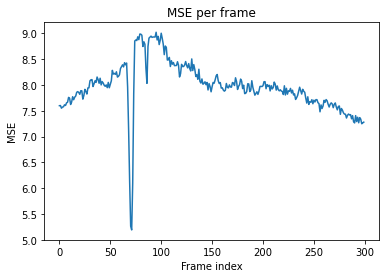

Building the dictionary:   0%|          | 0/7196334 [00:00<?, ?it/s]


#--------------------------------------#
DCT+quantization+runlength+LZW on ./videos/coastguard.qcif


Encoding: 100%|██████████| 1263000/1263000 [00:01<00:00, 1246821.92it/s]


B/symb:  2.3256020272166107
Original size (MiB):  10.87646484375
Compressed size (%):  29.070025340207632

#--------------------------------------#
DCT+quantization+runlength+Huffman on ./videos/coastguard.qcif


DCT compute:   0%|          | 1/300 [00:00<02:08,  2.32it/s]

B/symb:  2.4480457351290683
Original size (MiB):  10.87646484375
Compressed size (%):  30.600571689113355





DCT compute: 100%|██████████| 300/300 [02:11<00:00,  2.28it/s]


#############################################################################################
#--------------------------------------#
DCT+quantization+runlength on ./videos/hall.qcif
Original size (MiB):  10.87646484375
Compressed size (%):  47.513546927609426
Mean MSE:  6.735318813131314


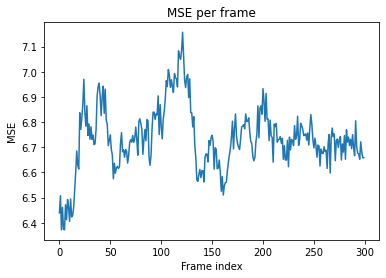

Building the dictionary:   1%|          | 53539/5418824 [00:00<00:10, 535342.01it/s]


#--------------------------------------#
DCT+quantization+runlength+LZW on ./videos/hall.qcif


Encoding: 100%|██████████| 865718/865718 [00:00<00:00, 1241568.73it/s]


B/symb:  1.5181665614478115
Original size (MiB):  10.87646484375
Compressed size (%):  18.977082018097644

#--------------------------------------#
DCT+quantization+runlength+Huffman on ./videos/hall.qcif


DCT compute:   0%|          | 1/300 [00:00<02:13,  2.24it/s]

B/symb:  1.862652742704826
Original size (MiB):  10.87646484375
Compressed size (%):  23.283159283810324





DCT compute: 100%|██████████| 300/300 [02:14<00:00,  2.23it/s]


#############################################################################################
#--------------------------------------#
DCT+quantization+runlength on ./videos/news.qcif
Original size (MiB):  10.87646484375
Compressed size (%):  34.160046647025816
Mean MSE:  18.00270780723906


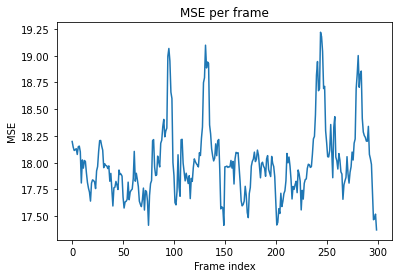

Building the dictionary:   1%|          | 46360/3895884 [00:00<00:08, 463565.07it/s]


#--------------------------------------#
DCT+quantization+runlength+LZW on ./videos/news.qcif


Encoding: 100%|██████████| 522871/522871 [00:00<00:00, 1040631.51it/s]


B/symb:  0.8710871738215489
Original size (MiB):  10.87646484375
Compressed size (%):  10.888589672769362

#--------------------------------------#
DCT+quantization+runlength+Huffman on ./videos/news.qcif


DCT compute:   0%|          | 1/300 [00:00<02:43,  1.83it/s]

B/symb:  1.273668367704826
Original size (MiB):  10.87646484375
Compressed size (%):  15.920854596310324





DCT compute: 100%|██████████| 300/300 [02:27<00:00,  2.04it/s]


#############################################################################################
#--------------------------------------#
DCT+quantization+runlength on ./videos/akiyo.qcif
Original size (MiB):  10.87646484375
Compressed size (%):  23.06208789281706
Mean MSE:  13.773427679573512


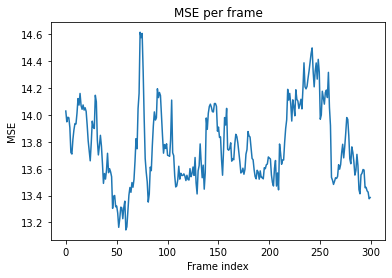

Building the dictionary:   2%|▏         | 45656/2630184 [00:00<00:05, 456320.00it/s]


#--------------------------------------#
DCT+quantization+runlength+LZW on ./videos/akiyo.qcif


Encoding:   0%|          | 0/2630185 [00:00<?, ?it/s]

B/symb:  0.5137259750280584
Original size (MiB):  10.87646484375
Compressed size (%):  6.42157468785073

#--------------------------------------#
DCT+quantization+runlength+Huffman on ./videos/akiyo.qcif


Encoding: 100%|██████████| 2630185/2630185 [00:02<00:00, 1223754.35it/s]


B/symb:  0.8187843714927048
Original size (MiB):  10.87646484375
Compressed size (%):  10.23480464365881





DCT compute: 100%|██████████| 382/382 [02:56<00:00,  2.16it/s]


#############################################################################################
#--------------------------------------#
DCT+quantization+runlength on ./videos/carphone.qcif
Original size (MiB):  13.849365234375
Compressed size (%):  36.12731398848872
Mean MSE:  10.491448626756219


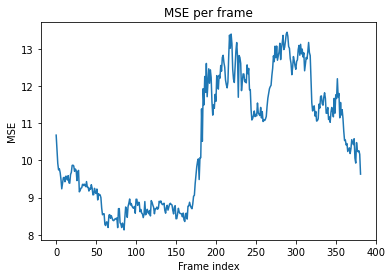

Building the dictionary:   1%|          | 48036/5246448 [00:00<00:10, 480323.81it/s]


#--------------------------------------#
DCT+quantization+runlength+LZW on ./videos/carphone.qcif


Encoding: 100%|██████████| 882852/882852 [00:00<00:00, 1003163.86it/s]


B/symb:  1.2158745229344052
Original size (MiB):  13.849365234375
Compressed size (%):  15.198431536680065

#--------------------------------------#
DCT+quantization+runlength+Huffman on ./videos/carphone.qcif


Encoding: 100%|██████████| 5246449/5246449 [00:04<00:00, 1096195.24it/s]

B/symb:  1.3743432773414777
Original size (MiB):  13.849365234375
Compressed size (%):  17.17929096676847





In [3]:
for fname in videos_names:
    frames = read_qcif(fname)
    nb_frames = len(frames)
    
    dct = DCT_compute(frames,Q='opti',offset=128)
    decompressed_data = DCT_inverse(dct,offset=128)
    save_qcif("test_res_dct.qcif",decompressed_data)
    print("#############################################################################################")
    print("#--------------------------------------#")
    print("DCT+quantization+runlength on "+fname)
    print("Original size (MiB): ", frames.size/1024**2)
    print("Compressed size (%): ", dct.size/frames.size*100)
    quality_benchmark(frames,decompressed_data)
    print()
    print("#--------------------------------------#")
    print("DCT+quantization+runlength+LZW on "+fname)
    bitstream = LZW_encode(np.array(dct.flatten()))
    compression_benchmark(frames,bitstream)
    print()
    print("#--------------------------------------#")
    print("DCT+quantization+runlength+Huffman on "+fname)
    bitstream = Huffman_encode(np.array(dct.flatten()))
    compression_benchmark(frames,bitstream)
    print("\n\n")

# Compression using the difference image, the DCT, quantization with psychovisaul matrices runlength and entropic coding

DCT compute: 100%|██████████| 300/300 [02:38<00:00,  1.90it/s]


#############################################################################################
#--------------------------------------#
Diff+DCT+quantization+runlength on ./videos/coastguard.qcif
Original size (MiB):  10.87646484375
Compressed size (%):  58.24485304433221
Mean MSE:  30.573948600589222


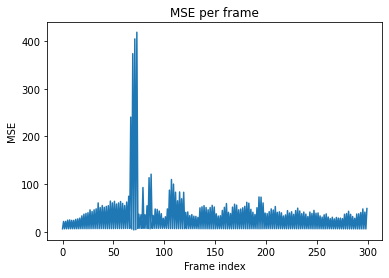

Building the dictionary:   0%|          | 0/6642708 [00:00<?, ?it/s]


#--------------------------------------#
Diff+DCT+quantization+runlength+LZW on ./videos/coastguard.qcif


Encoding: 100%|██████████| 1106218/1106218 [00:01<00:00, 1024989.44it/s]


B/symb:  2.0369146324354657
Original size (MiB):  10.87646484375
Compressed size (%):  25.46143290544332

#--------------------------------------#
Diff+DCT+quantization+runlength+Huffman on ./videos/coastguard.qcif


Encoding: 100%|██████████| 6642709/6642709 [00:05<00:00, 1130759.87it/s]


B/symb:  2.0777318322109988
Original size (MiB):  10.87646484375
Compressed size (%):  25.971647902637486





DCT compute: 100%|██████████| 300/300 [02:40<00:00,  1.87it/s]


#############################################################################################
#--------------------------------------#
Diff+DCT+quantization+runlength on ./videos/hall.qcif
Original size (MiB):  10.87646484375
Compressed size (%):  36.6737075617284
Mean MSE:  10.42382295173962


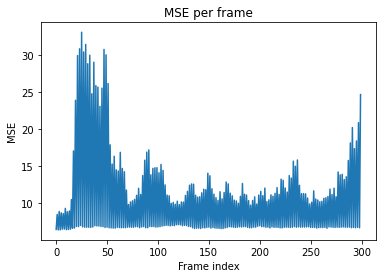

Building the dictionary:   1%|          | 44221/4182562 [00:00<00:09, 442175.63it/s]


#--------------------------------------#
Diff+DCT+quantization+runlength+LZW on ./videos/hall.qcif


Encoding: 100%|██████████| 689709/689709 [00:00<00:00, 991833.22it/s] 


B/symb:  1.2095088033108867
Original size (MiB):  10.87646484375
Compressed size (%):  15.118860041386084

#--------------------------------------#
Diff+DCT+quantization+runlength+Huffman on ./videos/hall.qcif


Encoding: 100%|██████████| 4182563/4182563 [00:03<00:00, 1102538.62it/s]


B/symb:  1.3318365074354657
Original size (MiB):  10.87646484375
Compressed size (%):  16.64795634294332





DCT compute: 100%|██████████| 300/300 [02:40<00:00,  1.87it/s]


#############################################################################################
#--------------------------------------#
Diff+DCT+quantization+runlength on ./videos/news.qcif
Original size (MiB):  10.87646484375
Compressed size (%):  21.19545279180696
Mean MSE:  25.636952511223345


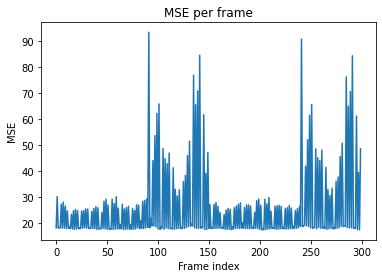

Building the dictionary:   2%|▏         | 49159/2417298 [00:00<00:04, 491499.07it/s]


#--------------------------------------#
Diff+DCT+quantization+runlength+LZW on ./videos/news.qcif


Encoding:   0%|          | 0/2417299 [00:00<?, ?it/s]

B/symb:  0.5643979727833894
Original size (MiB):  10.87646484375
Compressed size (%):  7.054974659792368

#--------------------------------------#
Diff+DCT+quantization+runlength+Huffman on ./videos/news.qcif


Encoding: 100%|██████████| 2417299/2417299 [00:02<00:00, 1071951.25it/s]


B/symb:  0.7283577090347924
Original size (MiB):  10.87646484375
Compressed size (%):  9.104471362934904





DCT compute: 100%|██████████| 300/300 [02:38<00:00,  1.89it/s]


#############################################################################################
#--------------------------------------#
Diff+DCT+quantization+runlength on ./videos/akiyo.qcif
Original size (MiB):  10.87646484375
Compressed size (%):  14.206378016273849
Mean MSE:  14.516446145482602


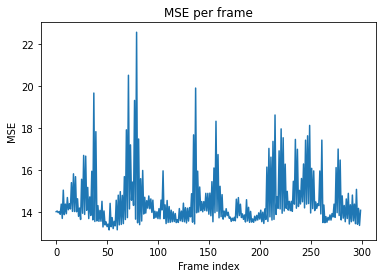

Building the dictionary:   3%|▎         | 42642/1620208 [00:00<00:03, 426379.74it/s]


#--------------------------------------#
Diff+DCT+quantization+runlength+LZW on ./videos/akiyo.qcif


Encoding:   0%|          | 0/1620209 [00:00<?, ?it/s]

B/symb:  0.30239811307519643
Original size (MiB):  10.87646484375
Compressed size (%):  3.779976413439955

#--------------------------------------#
Diff+DCT+quantization+runlength+Huffman on ./videos/akiyo.qcif


Encoding: 100%|██████████| 1620209/1620209 [00:01<00:00, 1104226.61it/s]


B/symb:  0.4473091154601571
Original size (MiB):  10.87646484375
Compressed size (%):  5.591363943251964





DCT compute: 100%|██████████| 382/382 [03:20<00:00,  1.90it/s]


#############################################################################################
#--------------------------------------#
Diff+DCT+quantization+runlength on ./videos/carphone.qcif
Original size (MiB):  13.849365234375
Compressed size (%):  29.485635422726393
Mean MSE:  30.09115726417755


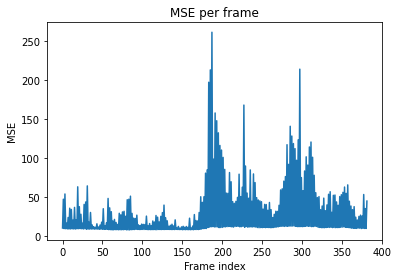

Building the dictionary:   1%|▏         | 61820/4281936 [00:00<00:06, 618150.48it/s]


#--------------------------------------#
Diff+DCT+quantization+runlength+LZW on ./videos/carphone.qcif


Encoding: 100%|██████████| 715510/715510 [00:00<00:00, 1228406.74it/s]


B/symb:  0.9854094225412943
Original size (MiB):  13.849365234375
Compressed size (%):  12.31761778176618

#--------------------------------------#
Diff+DCT+quantization+runlength+Huffman on ./videos/carphone.qcif


Encoding: 100%|██████████| 4281937/4281937 [00:03<00:00, 1310837.33it/s]

B/symb:  1.0339882380744618
Original size (MiB):  13.849365234375
Compressed size (%):  12.924852975930772





In [4]:
nb_diff_frame = 2
offset_seq = [128,0]

for fname in videos_names:
    frames = read_qcif(fname)
    nb_frames = len(frames)
    
    diff = Difference_image_compute(frames, nb_diff_frame)
    dct = DCT_compute(diff,Q='opti',offset=offset_seq)
    decompressed_diff = DCT_inverse(dct,offset=offset_seq)
    decompressed_data = Difference_image_reverse(decompressed_diff,nb_diff_frame)
    save_qcif("test_res_diffdct.qcif",decompressed_data)
    print("#############################################################################################")
    print("#--------------------------------------#")
    print("Diff+DCT+quantization+runlength on "+fname)
    print("Original size (MiB): ", frames.size/1024**2)
    print("Compressed size (%): ", dct.size/frames.size*100)
    quality_benchmark(frames,decompressed_data)
    print()
    print("#--------------------------------------#")
    print("Diff+DCT+quantization+runlength+LZW on "+fname)
    bitstream = LZW_encode(np.array(dct.flatten()))
    compression_benchmark(frames,bitstream)
    print()
    print("#--------------------------------------#")
    print("Diff+DCT+quantization+runlength+Huffman on "+fname)
    bitstream = Huffman_encode(np.array(dct.flatten()))
    compression_benchmark(frames,bitstream)
    print("\n\n")

# Compression using motion estimation, DCT, quantization with psychovisal, matrices runlength and entropic coding

In [5]:
for fname in videos_names[1:2]:
    frames = read_qcif(fname,2)
    nb_frames = len(frames)
    
    symbols = Motion_estimate_compute(frames)
    decompressed_data = Motion_estimate_inverse(symbols)
    save_qcif("test_res_diff.qcif",decompressed_data)
    print("#############################################################################################")
    print("#--------------------------------------#")
    print("Diff on "+fname)
    quality_benchmark(frames,decompressed_data)
    print()
    print("#--------------------------------------#")
    print("Diff+LZW on "+fname)
    bitstream = LZW_encode(diff.flatten())
    decompressed_diff = LZW_decode(bitstream)
    decompressed_data = Difference_image_reverse(np.array(decompressed_diff,dtype=float).reshape(nb_frames,-1),5)
    compression_benchmark(frames,bitstream)
    print()
    print("#--------------------------------------#")
    print("Diff+Huffman on "+fname)
    bitstream = Huffman_encode(diff.flatten())
    decompressed_diff = Huffman_decode(bitstream)
    decompressed_data = Difference_image_reverse(np.array(decompressed_diff,dtype=float).reshape(nb_frames,-1),5)
    compression_benchmark(frames,bitstream)
    print("\n\n")

DCT compute:   0%|          | 0/1 [00:00<?, ?it/s]

(18013,)


DCT compute: 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]


(17617,)
[  0  -1   4   1   4  -1   0   1   0   0 118   0   1   0   2   0   1   1
  -1   1]
####
[  0  -1   4   1   4  -1   0   1   0   0 118   0   1   0   2   0   1   1
  -1   1]
(17880,)
Error DCT_inverse: inconsistente number of 8x8 blocks, last frame countain 588 blocks
(17508,)


IndexError: index 64 is out of bounds for axis 0 with size 64